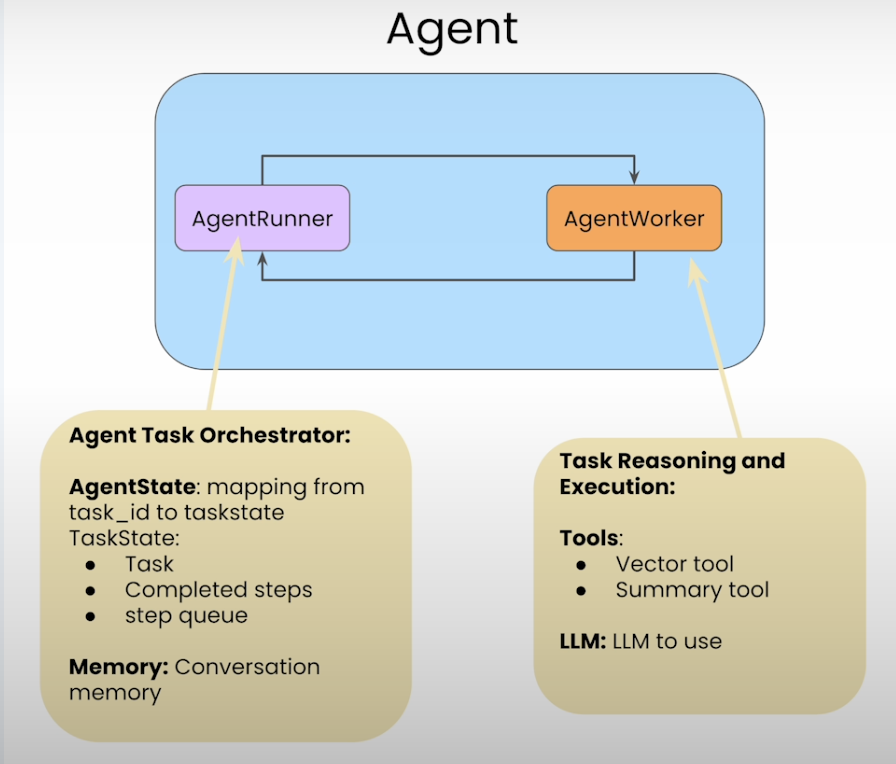

**`AgentRunner` (Task Orchestrator)
Maintains AgentState: mapping of task_id → TaskState, where each TaskState holds:**

The Task description/goal.

Completed steps.

Step queue: what's pending next.

Stores conversation memory: context/history needed across interactions
docs.npi.ai
.

Delegates each step to the FunctionCallingAgentWorker.

Updates TaskState upon receiving worker return values.

Maintains the planning loop: new user ask → decompose → call worker → update → loop until task is done

**`FunctionCallingAgentWorker` (Executor)
Receives atomic sub‑tasks from AgentRunner**

Uses Function‑Calling LLMs to decide and execute actions:

Calls tools (e.g., vector retrieval, summary function) with typed arguments.

Handles:

Vector search queries.

Summarization via LLM or specialized tools.

Any other plug-in tool (web search, APIs).

Returns structured JSON results or primitives back to Runner
Acts repeatedly on each planner-issued step until all are done.

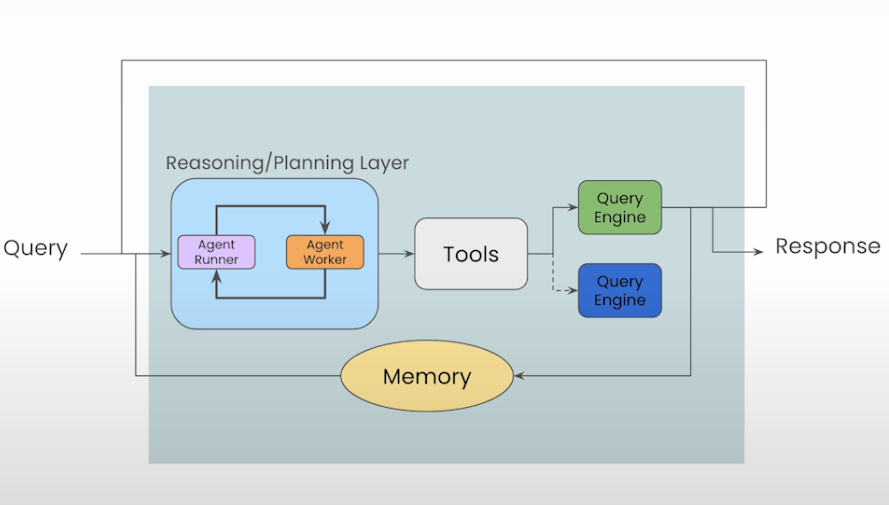

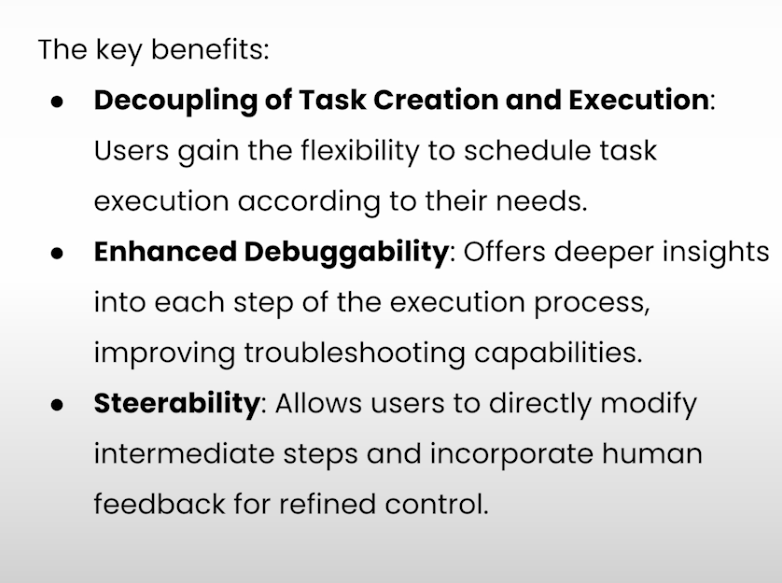

In [ ]:
%%capture
!pip install llama-index

In [ ]:
%pip install llama-index-embeddings-huggingface

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
%pip install llama-index-llms-google-genai llama-index

  Using cached llama_index-0.12.41-py3-none-any.whl.metadata (12 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.3/267.3 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.2/304.2 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.3/129.3 kB 8.3 MB/s eta 0:00:00


In [ ]:
from llama_index.llms.google_genai import GoogleGenAI
llm = GoogleGenAI(
    model = 'gemini-1.5-flash',
    api_key = ''
)

In [ ]:
from llama_index.embeddings.huggingface import HuggingFaceEmbedding
embed_model = HuggingFaceEmbedding(model_name="BAAI/bge-small-en-v1.5")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [62]:
from llama_index.core import Settings

Settings.llm = llm
Settings.embed_model = embed_model

In [18]:
from llama_index.core import SimpleDirectoryReader

file_name = input("Enter the file name (.pdf)")
documents = SimpleDirectoryReader(input_files=[file_name]).load_data()

Enter the file name (.pdf)hello.pdf


In [27]:
from llama_index.core import VectorStoreIndex
from llama_index.core.node_parser import SentenceSplitter
from llama_index.core.tools import FunctionTool

splitter = SentenceSplitter(
    chunk_size = 1000,
    chunk_overlap = 50
)

chunks = splitter.get_nodes_from_documents(documents)

In [24]:
vector_index = VectorStoreIndex(chunks)

In [25]:
def vector_query(query: str)->str:
  """
  Perform a vector search over an index.

  query (str): The dtring query to the embedded.
  page_numbers (List[str]): Filter by set of pages. Leave BLANK if we wnat to perform a vector search
  over all pages, Otherwise, filter by the set of specified pages.
  """
  query_engine = vector_index.as_query_engine(
      similarity_top_k = 5
  )
  response = query_engine.query(query)
  return response

In [26]:
print(vector_query("What skills do I have?"))

My skills include Python, C, TensorFlow, LangChain, Embeddings, Vector Search, RAG, OpenCV, Image Processing, Object Detection, MERN Stack (MongoDB, Express.js, React, Node.js), DBMS, Data Structures & Algorithms, and Linear Algebra.



In [29]:
vector_query_tool = FunctionTool.from_defaults(
    fn = vector_query,
    name = 'vector_store_retriever',
    description= "Useful for answering questions by searching through the uploaded document content using vector search. Use this tool for any question that requires retrieving information from the document."
)

In [34]:
response = llm.predict_and_call(
    [vector_query_tool],
    "Call the available tools with query ='what is my skills?'",
    verbose=True
)

response.response

=== Calling Function ===
Calling function: vector_store_retriever with args: {"query": "what is my skills?"}
=== Function Output ===
My skills encompass programming languages like Python and C; AI frameworks such as TensorFlow; NLP techniques including LangChain, embeddings, vector search, and RAG; computer vision expertise involving OpenCV, image processing, and object detection; web technologies including the MERN stack (MongoDB, Express.js, React, Node.js), and database management systems (DBMS); and core computer science concepts such as data structures and algorithms, and linear algebra.



'My skills encompass programming languages like Python and C; AI frameworks such as TensorFlow; NLP techniques including LangChain, embeddings, vector search, and RAG; computer vision expertise involving OpenCV, image processing, and object detection; web technologies including the MERN stack (MongoDB, Express.js, React, Node.js), and database management systems (DBMS); and core computer science concepts such as data structures and algorithms, and linear algebra.\n'

In [35]:
from llama_index.core import SummaryIndex

In [86]:
summary_index = SummaryIndex(chunks)


def summarize(query:str)->str:
  """
  Perform a search over an index.

  query (str): The string query to the embedded.
  page_numbers (List[str]): Filter by set of pages. Leave BLANK if we wnat to perform a vector search
  over all pages, Otherwise, filter by the set of specified pages.
  """
  query_engine = summary_index.as_query_engine(
      response_mode = "tree_summarize",
      use_async = True,
  )
  response = query_engine.query(query)
  return response

summary_tool = FunctionTool.from_defaults(
    fn = summarize,
    name = "summary_tool",
    description = "Useful for summarization questions and also the generic questions regarding the document."
)

In [40]:
response = llm.predict_and_call(
    [vector_query_tool, summary_tool],
    "decide and call the available tool based on the query: What are the skills?",
    verbose=True,
    allow_parallel_tool_calls=True
)
response.response

=== Calling Function ===
Calling function: vector_store_retriever with args: {"query": "What are the skills?"}
=== Function Output ===
The skills listed include Python and C programming languages; TensorFlow AI framework; NLP techniques including LangChain, embeddings, vector search, and RAG; OpenCV and image processing and object detection in computer vision; MERN stack web technologies (MongoDB, Express.js, React, Node.js), and DBMS; and core computer science concepts such as data structures and algorithms, and linear algebra.



'The skills listed include Python and C programming languages; TensorFlow AI framework; NLP techniques including LangChain, embeddings, vector search, and RAG; OpenCV and image processing and object detection in computer vision; MERN stack web technologies (MongoDB, Express.js, React, Node.js), and DBMS; and core computer science concepts such as data structures and algorithms, and linear algebra.\n'

In [41]:
from llama_index.core.agent import FunctionCallingAgentWorker
from llama_index.core.agent import AgentRunner

In [44]:
agent_worker = FunctionCallingAgentWorker.from_tools(
    [vector_query_tool, summary_tool],
    llm = llm,
    verbose = True
)

In [45]:
agent = AgentRunner(agent_worker)

In [76]:
response = agent.query(
    "use the available tools to answer the query: CGPA in the document, also comment on how good the CGPA is"
)

Added user message to memory: use the available tools to answer the query: CGPA in the document, also comment on how good the CGPA is
=== Calling Function ===
Calling function: vector_store_retriever with args: {"query": "CGPA in the document"}
=== Function Output ===
8.72
=== LLM Response ===
A CGPA of 8.72 is excellent.  This is above average and indicates strong academic performance.



In [80]:
agent.chat("tell me about the current position").response

Added user message to memory: tell me about the current position
=== Calling Function ===
Calling function: vector_store_retriever with args: {"query": "current position"}
=== Function Output ===
Head of AIML domain at Encode.AI
=== LLM Response ===
The current position is Head of AIML domain at Encode.AI.



'The current position is Head of AIML domain at Encode.AI.\n'

In [81]:
response = agent.chat("Tell me more about above role.")

Added user message to memory: Tell me more about above role.
=== Calling Function ===
Calling function: vector_store_retriever with args: {"query": "Head of AIML domain at Encode.AI"}
=== Function Output ===
The individual mentioned in the context is the Head of AI/ML at Encode AI.
=== LLM Response ===
Based on the available information, the role is Head of AI/ML at Encode AI.  No further details about the responsibilities or specifics of the role are available in the provided context.



In [84]:
task = agent.create_task(
    "What is the name,"
    "What is the current role,"
    "What are the skills?"
    "What are the areas of improvements wrt to the skills"
)

In [87]:
step_output = agent.run_step(task.task_id)

=== LLM Response ===
Here's a summary of the information extracted:

* **Name:** Pratham M J
* **Current Role:** Head of AIML domain
* **Skills:** Python, C, TensorFlow, LangChain, Embeddings, Vector Search, RAG, OpenCV, Image Processing, Object Detection, MERN Stack (MongoDB, Express.js, React, Node.js), DBMS, Data Structures & Algorithms, Linear Algebra.
* **Areas of Improvement:**  Further enhancing skills in advanced AI/ML techniques (beyond deep learning, NLP, and computer vision), exploring other AI frameworks, working on diverse projects, improving proficiency in additional programming languages, delving deeper into complex AI models and algorithms, staying updated with the latest advancements, and refining problem-solving abilities.



In [88]:
completed_steps = agent.get_completed_steps(task.task_id)
print(f"Num completed for task {task.task_id}: {len(completed_steps)}")
print(completed_steps[0].output.sources[0].raw_output)

Num completed for task e09c6c37-6bf3-4968-8b7b-4477c7bfe7b5: 2
Pratham M J


In [90]:
upcoming_steps = agent.get_upcoming_steps(task.task_id)
print(f"Num upcoming steps for task {task.task_id}: {len(upcoming_steps)}")
upcoming_steps

Num upcoming steps for task e09c6c37-6bf3-4968-8b7b-4477c7bfe7b5: 0


[]